Note: the original book can be found here: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners/notebook


In [1]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
print(check_output(["ls","../ML beg"]).decode("utf8"))

ML Tutorial for Beginners.ipynb
column_2C_weka.csv
column_3C_weka.csv



In [3]:
# Read in the data for processing 
data=pd.read_csv("../ML beg/column_2C_weka.csv")
print(plt.style.available) # Look at available plot styles 

plt.style.use("ggplot")


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# 8 Machine Learning (ML) 
This is a continuition of the DS for beginner series 
Core libraries of consideration here includes:
1. SKlearn
2. Keras
3. Tensorflow
For now, we should start with sklearn

Some Terminology 
Features: (AKA)
1. Predictor Variable
2. Independent Variable
3. Columns
4. Inputs

Target Variables: (AKA)
1. Response variable
2. Class 
3. dependent variable
4. Output
5. Results


In [12]:
data["class"].value_counts() #I always forget what this API is 
#Interesting thing here is that this is the column label method in retrieving a series

#From looking at the count for the target variables, we can figure out 
# How balanced vs not balanced 

Abnormal    210
Normal      100
Name: class, dtype: int64

In [18]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [21]:
# Check out describing the dataset
round(data.describe())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.0,310.0,310.0,310.0,310.0,310.0
mean,60.0,18.0,52.0,43.0,118.0,26.0
std,17.0,10.0,19.0,13.0,13.0,38.0
min,26.0,-7.0,14.0,13.0,70.0,-11.0
25%,46.0,11.0,37.0,33.0,111.0,2.0
50%,59.0,16.0,50.0,42.0,118.0,12.0
75%,73.0,22.0,63.0,53.0,125.0,41.0
max,130.0,49.0,126.0,121.0,163.0,419.0


In [23]:
#data types 
data.info()
#Other than class column, everything else is continuous variable
#Infor method can also inform us about whether missing values exist in the 
#dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


To quickly look at how all columns correlate with each other through the scatter plot.

plt.plotting.scatter_matrix:
1. creating a color list to conditionally color the data serires
2. c: specifying the colors 
3. figsize: figure size
4. diagonal: histogram for each features (Instead of the stragithline)
5. alpha: opacity
6. s: size of the marker
7. marker: specifying the marker type 

In [26]:
color_list=["red" if i=="Abnormal" else "green" for i in data.loc[:,"class"]]
color_list[:10]
# This list comprehension is a way to create a new column whose values 
# correspond to each row in the data frame

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [33]:
data.shape

(310, 7)

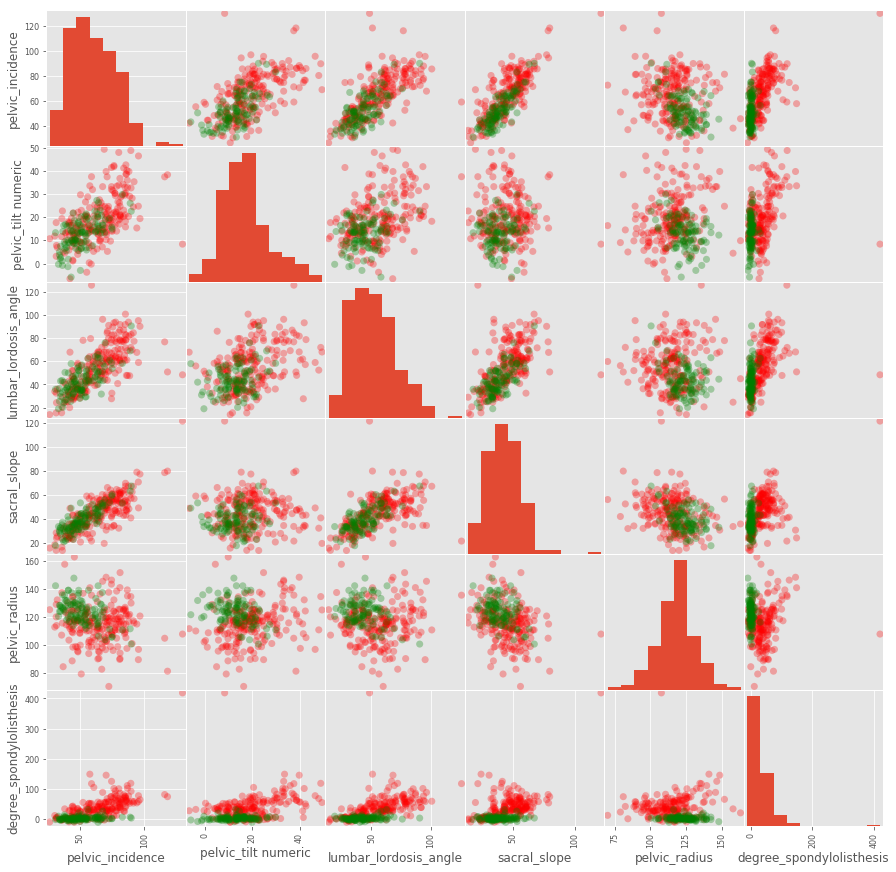

In [32]:
#Notice that in specifying the what data to plot, a boolean condition
# is added
pd.plotting.scatter_matrix(data.loc[:,data.columns !="class"],
                           c=color_list,
                           figsize=[15,15],
                           diagonal='hist',
                           alpha=0.3,
                           s=200,
                           marker='.');
plt.show()
#Plotting this paultry dataset like this took a long time actually
# The dataset only has 310 rows and 7 columns. Scaling this to large dataset
# could potentially be worrisome 

Using seaborn's countplot for a specific categorical columns
We can use the classification method KNN 

Abnormal    210
Normal      100
Name: class, dtype: int64

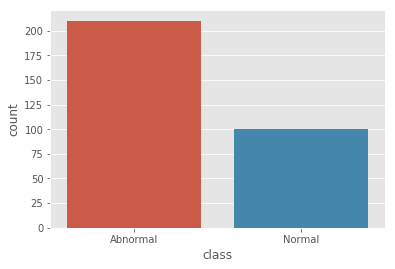

In [36]:
sns.countplot(x="class",data=data) #Note the difference in calling this API
data["class"].value_counts()

### K Nearest neighbors (KNN)
1. KNN: look at the k closest labeled data points
2. Classification method 
3. First needs to train the data set
4. x: features
5. target variables (normal, abnormal)
6. n_neighbors: K.

In [37]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)


In [38]:
x,y=data.loc[:,data.columns != "class"], data.loc[:,"class"]
knn.fit(x,y)
# This is essentially using KNN to predict the classification in the target columns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
prediction=knn.predict(x)


In [44]:
round(sum(prediction==data["class"])/len(data["class"]),2)

0.93

In [40]:
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Ab

The above was just an illustration of applying KNN but we didn't split the data as we should. We should split it into:
1. Train
2. Test
3. Validation 

train_test_split(x,y,test_size=0.3,random_state=1
1. x: features
2. y: target variables( normal, abnormal)
3. Test_size: percentage of test size. test_size=0.3 means 30%
4. Random_state:sets a seed.
5. score(x_test,y_test): predict and gives accuracy on test sets

In [48]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                              random_state=1)

#Notice about 4 arrays are output as a result of the pandas API
knn=KNeighborsClassifier(n_neighbors=3)
x,y =data.loc[:,data.columns !='class'],data.loc[:,'class']
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("with KNN (k=3) accuracy is: ",knn.score(x_test,y_test)) #accurary

with KNN (k=3) accuracy is:  0.860215053763


The question of what k should be depends on the model complexity
Model Complexity:
1. K has general name. It is a hyperparameter. 
2. LIterature states that if k is small, complex model can lead to overfit. Overfit means the model memorizes the training sets and cannot predict with good accuracy.
3. If k is big, model that is less complex model can lead to underfit 
We can vary the k value to find the accurary 

In [58]:
# Model complexity and hyperparameter tuning
neig=np.arange(1,100)
train_accuracy=[]
test_accuracy=[]
for i,k in enumerate(neig): #Why enumerate is used here?
    knn=KNeighborsClassifier(n_neighbors=k)
    #fit with knn
    knn.fit(x_train,y_train)
    #Training accurary
    train_accuracy.append(knn.score(x_train,y_train))
    #Test accuracy:
    test_accuracy.append(knn.score(x_test,y_test))


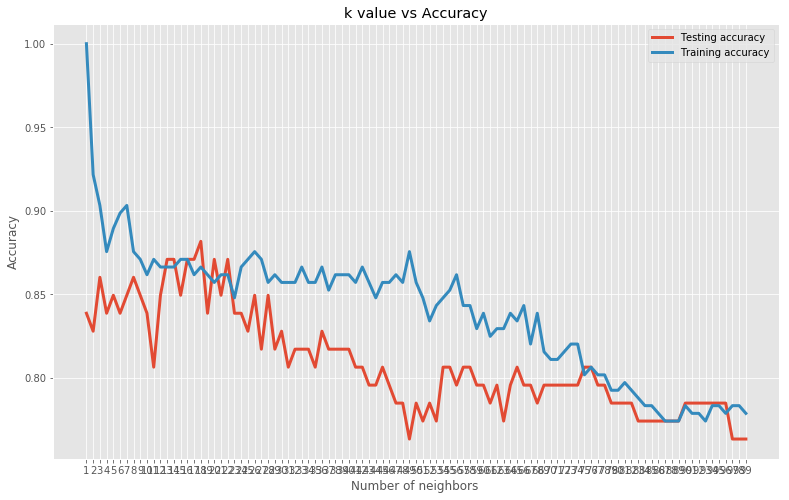

In [59]:
#Plotting out the result 
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label="Testing accuracy",linewidth=3)
plt.plot(neig,train_accuracy, label="Training accuracy",linewidth=3)
plt.legend()
plt.title("k value vs Accuracy")
plt.xlabel("Number of neighbors ")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.show()

In [60]:
print("Best accuracy is {} with k={}".format(np.max(test_accuracy),
      1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8817204301075269 with k=18


Section summary:
KNN:
1. How to split data
2. How to fit, predict data
3. How to measure model performance (accuracy)
4. How to choose hyperparameter (k)

### Regression
1. Consider target to be scral_slope
2. reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1).

In [61]:
# Create data1 that includes pelvic_incidence that ia feature and scral_slope that's the target
data1=data[data["class"]=='Abnormal']
# Using this to filter down the data so that the dataset has only abnormal data

In [67]:
x=np.array(data1.loc[:,"pelvic_incidence"]).reshape(-1,1)
#What exactly does the reshape method do here?
y=np.array(data1.loc[:,"sacral_slope"]).reshape(-1,1)
#the output is np numpy arrays

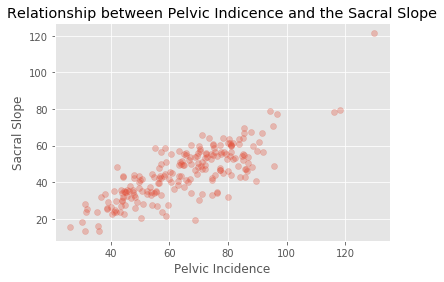

In [71]:
#scatter 
plt.scatter(x=x,y=y,alpha=0.3)
plt.title("Relationship between Pelvic Indicence and the Sacral Slope")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope");

1. Choose parameters of model according to minimum error function that is loss function
2. OLS function is the loss function
3. OLS sums all residuals but some positive and negative residuals can cancel each other 
4. The score uses the R squared method 


In [78]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression() 
# Why is the regression function call always saved first?
predict_space=np.linspace(min(x),max(x)).reshape(-1,1) #Reshape changes the shape but why is -1 here
#Fit 
reg.fit(x,y)
#Predict
predicted=reg.predict(predict_space)
#R squared
print('R^2 score: ',reg.score(x,y))

R^2 score:  0.645841048108


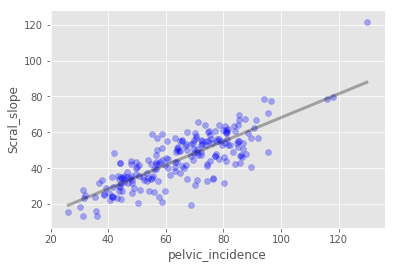

In [81]:
#Plot regression line and scatter 
plt.plot(predict_space,predicted,color="black",linewidth=3,alpha=0.3)
plt.scatter(x=x,y=y,c="blue",alpha=.3)
plt.xlabel("pelvic_incidence")
plt.ylabel("Scral_slope")
plt.show()

# Cross Validation
The model performance in a way depends on the train_test_split. Cross validation would produce accuracies that are more trustworthy
1. K folds
2. When k increases, the computational cost inceases
3. corss_val_score (reg,x,y,cv=5): use reg(linear regression) with x,y and k is 5 means the data set is train test splited 5 times

In [86]:
#CV
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
k=10
cv_result=cross_val_score(reg,x,y,cv=k)
print("cv scores: ", cv_result) #remember cv_result is returning a list of all accuracies
print("CV score average: ",sum(cv_result/k))
#NP.sum is faster for numpy arrays but slower for lists

cv scores:  [ 0.72019898  0.02778742  0.23318031 -0.01672668  0.64431955  0.47692965
  0.18160547  0.18133607  0.34465986  0.24148151]
CV score average:  0.303477213572


In [137]:
#Optimal split
cv_score_avg=[]
k=np.arange(5,20)
for i in k:
    cv_result=cross_val_score(reg,x,y,cv=i)
    cv_score_avg.append(sum(cv_result)/i)


0.4210857377256712

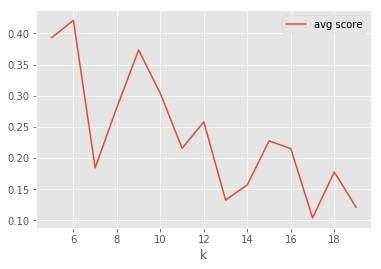

In [139]:
test=pd.DataFrame({"k":k,"avg score":cv_score_avg})
test=test.set_index("k")
test.plot();
# The other take away is that the set_index method itself doesn't apply 
# On top of the data frame by itself
#It is very curious that after spliting it 100 fold the regression score is negative for some reason

max(test['avg score'])

### Regularized Regression
If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. This may cause overfitting. To avoid overfitting, we can use regularization to penalize large coefficients

#### Ridge
1. Ridge regression: L2 (Alpha is a parameter that we need to choose to fit and predict. Picking alpha is similar to picking k.)
2. When alpha is zero, the loss function becomes OLS
3. If alpha is small, it could cause overfitting
4. Big alpha can cause underfitting

#### Lasso


In [121]:
# Ridge 
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(x_train,y_train)
ridge_predict=ridge.predict(x_test)
print("Ridge score",ridge.score(x_test,y_test))

Ridge score 0.560828791884


0.57326137561541568

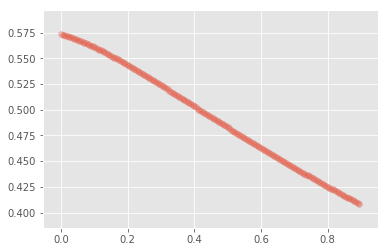

In [142]:
# Look at how ridge varies with respect to different alpha values 
alphas=np.arange(0,0.9,0.005)
ridge_scores=[]
for i in alphas:
    ridge=Ridge(alpha=i,normalize=True)
    ridge.fit(x_train,y_train)
    ridge_predict=ridge.predict(x_test)
    ridge_scores.append(ridge.score(x_test,y_test))
plt.scatter(x=alphas,y=ridge_scores,alpha=0.3);
# Seems that linear regression is more accurate?
max(ridge_scores)
# How come when alpha is zero the score is the highest yet linear regression yields lower than this

In [143]:
# Lasso
from sklearn.linear_model import Lasso
x=np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric',
                        'lumbar_lordosis_angle','pelvic_radius']])
#why does this have to be converted into numpy arrays?

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.3)
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)
lasso_predict=lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print("Lasso coefficients: ",lasso.coef_)

Lasso score:  0.943906407422
Lasso coefficients:  [ 0.80726792 -0.67547279  0.01043698 -0.        ]


In [ ]:
# Let's go through this to look at how alpha values impact lasso scores
